# KNN 알고리즘 구현하기
    그리고 사이킷런 맛보기
---

1) `KNN(K-최근접-이웃) 알고리즘`을 구현해본다.  

2) `사이킷런`을 활용할것이다.

---

### 알고리즘 용어
* KNN 알고리즘
* 교차검증 : 기존 데이터를 k개로 나눠서 k번 정확도를 검증하는 방법
* k-fold 교차검증
* 훈련데이터(train)
* 검증데이터(test)

### scikit-learn
* from `sklearn.neighbors` import `KNeighborsClassifier`
* from `sklearn.model_selection` import `cross_val_score`
* `KNeighborsClassifier(n_neighbors=k)`는 k값 기준의 knn모델을 생성.
* `train_test_split()` : 학습데이터와 검증데이터로 나눈다.
* `cross_val_score(knn, )` : kNN모델의 교차검증을 수행한다.
* 학습은 `fit(..)`
* 예측은 `predict( ..)`
* 검증은 `accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)`

### python(numpy, pandas)

* range(start, end, 간격)
* df.drop("레이블 이름"): 필요없는 레이블 지우기
* `np.ravel([[1,2,3],[4,5,6]])`은 입력한 리스트를 1차원 리스트로 만들어줌.  
    `[1,2,3,4,5,6]`을 출력
* ...

---

### 구현할 내용 요약
KNN은 예측 데이터로부터 가까운 데이터의 클래스를 파악하여, 가장 개수가 많은 클래스로 예측하는 알고리즘이다.

* 데이터를 불러온다음, 필요한 데이터만 추린다.   
   그리고 전체 데이터를 `훈련데이터`와 `검증데이터`로 나누는데, 이때 사이킷런의  `train_test_split`함수를 쓸것이다.  
   `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)`처럼 리스트 2개혹은 4개의 리턴값을 갖는다  
   
   

* 근접한 몇개의 데이터를 비교하고자 하는데,   
    몇개까지 비교할지를 `k`라고 한다.(즉, 비교할 근접데이터의 갯수를 k라고 한다)  
    k는 비교할 클래스가 비기지 않도록 홀수로 정한다.  
    또한 k=1는 너무 편향적이기때문에 `k=3`부터 비교할것이다  

* k=3부터 k가 가질수 있는 최대값까지를 비교할것  
    - `range(3, max, 2)`로 `k_list`를 구한다.  
        (3부터 max까지의 홀수로 이루어진 리스트)


* 각 k값마다 검증결과를 계산하여 비교한다.
    `for k in k_list`로 시작하는 반복문을 사용할 것이다.
    - 1루프 당 k를 비교한다.
    - 매 루프당, 계산한 검증결과는 `validation-score`라는 시리즈에 모두 저장(append)한다.


* for문이 모두 진행된 후에 `cross_val_score`함수를 통해 최적의 k값을 알수 있다.

* 최적의 k값을 활용해서 모델을 테스트한다.
    이전에 만들어둔 검증데이터를 `x_test`로 하고, `knn.predict(x_test)` 수행.
    
* 결과를 시각화한다.

---


In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 불러오기

In [2]:
#데이터 불러오기(이전장에서 만들어서 pkl로 저장해두었음)
with open('./heo-data/pkl/basketball_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
        
with open('./heo-data/pkl/basketball_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [3]:
# 사이킷런의 kNN라이브러리 import하기.
# (1)  KNeighborsClassifier(KNN분류모델) : sklearn.neighbors로부터
# (2)  cross_val_score(교차검증) : sklearn.model_selection로부터
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [4]:
# 우리가 가진 학습 데이터는 총 80개의 row로 구성되어있다.
print(train.shape)
train.head()

(80, 5)


,Player,Pos,3P,TRB,BLK
77,Willie Reed,C,0.0,4.7,0.7
48,Richaun Holmes,C,0.5,5.5,1.0
64,Wesley Matthews,SG,2.4,3.5,0.2
88,Garrett Temple,SG,1.3,2.8,0.4
17,Jordan Clarkson,SG,1.4,3.0,0.1


In [5]:
# 최적의 k값을 구한다.

# k가 총데이터 갯수의 절반을 넘지 않도록 max_k_range값을 지정한다.
max_k_range = train.shape[0] // 2

# 가능한 k값을 k_list에 저장한다. (k는 3부터 max_k_range까지의 홀수 )
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)


x_train = train[['3P', 'BLK' , 'TRB']]
y_train = train[['Pos']]

print(type(train))
print(type(x_train))
print(x_train.head())
print(type(y_train))
print(y_train.head())


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
     3P  BLK  TRB
77  0.0  0.7  4.7
48  0.5  1.0  5.5
64  2.4  0.2  3.5
88  1.3  0.4  2.8
17  1.4  0.1  3.0
<class 'pandas.core.frame.DataFrame'>
   Pos
77   C
48   C
64  SG
88  SG
17  SG


In [35]:
cross_validation_scores = []

# 10-폴드 교차검증(10-fold cross validation)
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                             cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

print(type(cross_validation_scores))
cross_validation_scores

<class 'list'>


[0.9107142857142858,
 0.9107142857142858,
 0.9107142857142858,
 0.925,
 0.9107142857142858,
 0.925,
 0.925,
 0.9125,
 0.9013888888888889,
 0.9013888888888889,
 0.8871031746031747,
 0.8871031746031747,
 0.8871031746031747,
 0.8746031746031747,
 0.8621031746031746,
 0.8621031746031746,
 0.8621031746031746,
 0.8621031746031746,
 0.8496031746031747]

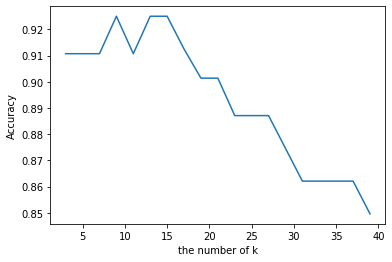

In [36]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [44]:
# find best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 9


---
# 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [45]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# knn 모델 생성.
knn = KNeighborsClassifier(n_neighbors=k)

# (x)data features, (y)target value를 추출한다.
x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

# knn모델을 훈련? 그냥 데이터를 갖다 주는거 밖에 없지 않나?
knn.fit(x_train, y_train.values.ravel())

# 검증(test)에 필요한 값을 가져온다.
x_test = test[['3P', 'BLK']] #x:features
y_test = test[['Pos']] #y:targets

# test
pred = knn.predict(x_test)

In [46]:
# check ground_truth with knn prediction
comparison = pd.DataFrame(
    {'prediction':pred, 'ground_truth':y_test.values.ravel(), 'check_true':pred==y_test.values.ravel()}) 
comparison

,prediction,ground_truth,check_true
0,SG,SG,True
1,C,C,True
2,SG,SG,True
3,SG,SG,True
4,SG,SG,True
5,SG,SG,True
6,SG,SG,True
7,C,C,True
8,C,C,True
9,C,C,True


In [47]:
# check accuracy
print("accuracy : "+ 
          str(accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.9


---
# 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [48]:
knn = KNeighborsClassifier(n_neighbors=k)

# select data features to be used in train
x_train = train[['3P', 'BLK', 'TRB']]
# select target
y_train = train[['Pos']]

# build knn model
knn.fit(x_train, y_train.values.ravel())

# select features to be used for prediction
x_test = test[['3P', 'BLK', 'TRB']]

# select target
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)

In [49]:
# check ground_truth with knn prediction
comparison = pd.DataFrame(
    {'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,SG,SG
3,SG,SG
4,SG,SG
5,SG,SG
6,SG,SG
7,C,C
8,C,C
9,C,C


In [50]:
# check accuracy
print("accuracy : " + 
          str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.9
